# <font color="red"> K means clustering </font>

step 1: import libraries

In [9]:
import numpy as np #deals with multidimensional arrays 
import pandas as pd #organizes data in tabular format
import matplotlib.pyplot as plt #visualize numpy computation
import seaborn as sns #adds to the visualization of Matplotlib
sns.set()
from sklearn.cluster import KMeans #machine learning library

step 2: load the dataset into the variable data
reference(https://drive.google.com/file/d/1nxr5XYg4JrwB_EtdWdyIwCT4gr85xfzb/view?usp=sharing)

In [10]:
data=pd.read_csv('./3.12. Example.csv')
data

Satisfaction  Loyalty
0              4    -1.33
1              6    -0.28
2              5    -0.99
3              7    -0.29
4              4     1.06
5              1    -1.66
6             10    -0.97
7              8    -0.32
8              8     1.02
9              8     0.68
10            10    -0.34
11             5     0.39
12             5    -1.69
13             2     0.67
14             7     0.27
15             9     1.36
16             8     1.38
17             7     1.36
18             7    -0.34
19             9     0.67
20            10     1.18
21             3    -1.69
22             4     1.04
23             3    -0.96
24             6     1.03
25             9    -0.99
26            10     0.37
27             9     0.03
28             3    -1.36
29             5     0.73

step 3: plotting the data, plots the scatter plot of the data

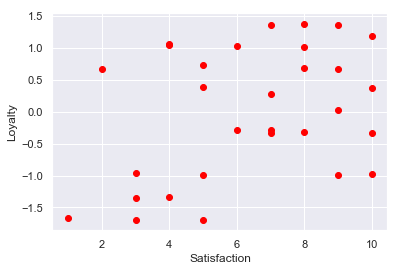

In [11]:
plt.scatter(data['Satisfaction'], data['Loyalty'],c='red') #c is the color
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In the variable x store a copy of the data

In [12]:
x=data.copy()

In [13]:
kmeans=KMeans(2) # creation of Number of clusters :2 
kmeans.fit(x) #fit the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Store a copy of data in the cluster and also create a column called "cluster_pred" where the predicted values resides.

In [14]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Now plot the clustered data with two parameters, there will be two clusters with one red and another blue

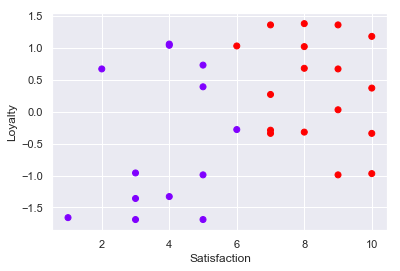

In [15]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In the above graph there is a problem it chooses satisfaction feature and grouped clusters by right to the 6 and left of it.
This does not provide appropriate results and discard the Loyalty feature

First standardise the data make use of sklearn to scale the data. 
The data is scaled around Zero Mean.

In [16]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

C:\Users\srilekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

when the user is confused about how many number of clusters need  to be formed then elbow method makes work easy

In [17]:
s=[]
for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    s.append(kmeans.inertia_)
s


[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.50301933048722,
 4.315662464700005,
 3.7504443965485503,
 3.3948017632187666,
 2.7948964349565557,
 2.4009836471184305,
 2.052146157615165,
 1.815657419232345,
 1.568232886450893,
 1.2977249211112023,
 1.2195114309760124,
 0.9716636175522552,
 0.7624616822071627,
 0.7469709907259051,
 0.5223105567141304,
 0.4239312504600061,
 0.3227119817275011,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

Visualize the elbow method

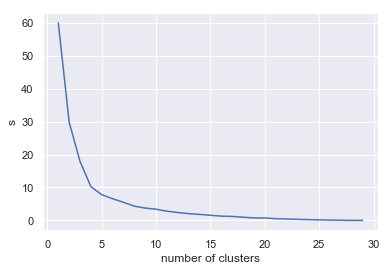

In [18]:
plt.plot(range(1,30),s)
plt.xlabel("number of clusters")
plt.ylabel("s")
plt.show()

In [19]:
kmeans_new=KMeans(4) #forming 4 clusters where the entire data is categorised to 0,1,2,3 
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new

Satisfaction  Loyalty  cluster_pred
0              4    -1.33             1
1              6    -0.28             3
2              5    -0.99             1
3              7    -0.29             3
4              4     1.06             2
5              1    -1.66             1
6             10    -0.97             3
7              8    -0.32             3
8              8     1.02             0
9              8     0.68             0
10            10    -0.34             3
11             5     0.39             2
12             5    -1.69             1
13             2     0.67             2
14             7     0.27             3
15             9     1.36             0
16             8     1.38             0
17             7     1.36             0
18             7    -0.34             3
19             9     0.67             0
20            10     1.18             0
21             3    -1.69             1
22             4     1.04             2
23             3    -0.96             1
24             6     1.03             2
25             9    -0.99             3
26            10     0.37             0
27             9     0.03             3
28             3    -1.36             1
29             5     0.73             2

Plot the new cluster

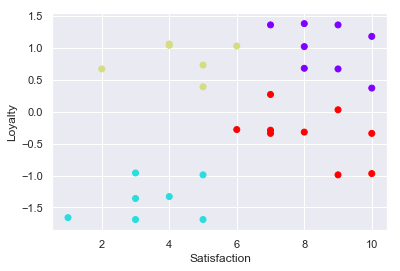

In [20]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c= cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()
 

From the graph, 
purple dots indicates less loyal and less satisfied(allienated)
red dots refers high loyalty and less satisfied people(supporters)
yellow dots are the people with high loyalty and high satisfaction(fans)
sky blue dots indicates the people who are in the midst of the things(in between)